In [ ]:
# Intall and import libraries
!pip install stop-words
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from tensorflow.python.client import device_lib
from keras.preprocessing.text import Tokenizer
from stop_words import get_stop_words
from tensorflow.keras import layers
from operator import itemgetter
from tensorflow import keras
from ast import literal_eval
from PIL import Image
from os import path

import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
import pandas as pd
import numpy as np
import json
import re

pd.set_option('display.max_columns', None)
directory='/content' ### Set Directory

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%bash
# Script to make sure data files can be used

directory='/content' ### Must be the same as the variable directory

if [ ! -d $directory ]; then
mkdir -p $directory
fi

cd $directory
wget https://storage.googleapis.com/yantk-siads-699/699_final.tar.gz
tar -xvzf ${directory}/699_final.tar.gz .
mkdir ${directory}/699
mkdir ${directory}/699/699
mv ${directory}/Data\ 20230612 ${directory}/699/699
mv ${directory}/model ${directory}/699/699

In [ ]:
# Import data from selected countries including Canada, UK and USA
# Data from https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset?select=US_youtube_trending_data.csv

country_list = ['CA','GB','US']

def get_categories(country):
    r = open(directory + '/699/699/Data 20230612/Youtube/' + country + '_category_id.json', "r")
    data = json.loads(r.read())
    categories_list = []
    for category in data['items']:
        categories_list.append([category['id'], category['snippet']['title']])
    categories = pd.DataFrame(categories_list).rename(columns={0: country+"_category_id", 1: country+"_category_name"})
    return categories

for country in country_list:
    exec(f'{country}_categories = get_categories(country)')              #country_categories = individual country's category dataframe
    exec(f'{country}_youtube_df = pd.read_csv(directory + "/699/699/Data 20230612/Youtube/" + country + "_youtube_trending_data.csv")') #country_youtube_df = individual country's YouTube dataframe

In [ ]:
# Combine all countries data, drop the duplicates and remove columns
df = pd.concat([CA_youtube_df,GB_youtube_df,US_youtube_df])

# Map the categoryId to categoryName with US's category table
categories = US_categories.rename(columns={"US_category_id": "categoryId", "US_category_name": "categoryName"})

categories['categoryId'] = categories['categoryId'].astype(str).astype(int)
df = df.merge(categories, on='categoryId', how='left')

In [ ]:
# Number of times in the trending video in any countries
df_pivot = pd.pivot_table(df[['video_id', 'title','view_count','categoryName']], values='view_count', index=['video_id','title','categoryName'], aggfunc='count')
x = df_pivot.sort_values(by='view_count', ascending=False).head(10)
display(x)

,,,view_count
video_id,title,categoryName,
aONT7atzqfw,"Floyd Mayweather vs Logan Paul: Fight goes the distance [Highlights, recap] | CBS Sports HQ",Sports,62
myjEoDypUD8,"Watch the uncensored moment Will Smith smacks Chris Rock on stage at the Oscars, drops F-bomb",News & Politics,50
CZJvBfoHDk0,Golden Buzzer: Nightbirde's Original Song Makes Simon Cowell Emotional - America's Got Talent 2021,Entertainment,49
LH0CWJYgEaI,I Pushed Tubbo Out Of A Plane...,Gaming,49
1WEAJ-DFkHE,"$1 vs $500,000 Plane Ticket!",Entertainment,49
HjBo--1n8lI,Rihanna’s FULL Apple Music Super Bowl LVII Halftime Show,Sports,48
wY6UyatwVTA,"India claim stunning series win, end Australia's Gabba streak | Vodafone Test Series 2020-21",Sports,48
M9SVC_lIpss,I Customized A School,Entertainment,46
Ecy1FBdCRbQ,[1299] Unpickable Locks From Stuff Made Here,Education,46


In [ ]:
# Top videos in terms of view_count
df_pivot = pd.pivot_table(df[['video_id', 'title', 'view_count','categoryName']], values='view_count', index=['video_id','title','categoryName'], aggfunc=np.max)
x = df_pivot.sort_values(by='view_count', ascending=False).head(10)
display(x)

x1 = x.reset_index()[['title','view_count']]
fig = px.bar(x1, x='title', y='view_count', width=1000, height=900, title='Videos with the Most View Counts')
fig.show()

,,,view_count
video_id,title,categoryName,
gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,Music,277791741
WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,Music,264407389
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Music,232649205
hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,Entertainment,206202284
qF0N19MgI3Q,JETSKI WAX PRANK!! 🤣 - #Shorts,Entertainment,194625542
vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,Music,184778248
POe9SOEKotk,BLACKPINK - ‘Shut Down’ M/V,Music,180654898
YudHcBIxlYw,JISOO - ‘꽃(FLOWER)’ M/V,Music,170333822
awkkyBH2zEo,LISA - 'LALISA' M/V,Music,161848202


In [ ]:
# Top videos in terms of likes
df_pivot = pd.pivot_table(df[['video_id', 'title', 'likes','categoryName']], values='likes', index=['video_id','title','categoryName'], aggfunc=np.max)
x = df_pivot.sort_values(by='likes', ascending=False).head(10)
display(x)

x1 = x.reset_index()[['title','likes']]
fig = px.bar(x1, x='title', y='likes', width=1000)
fig.show()

,,,likes
video_id,title,categoryName,
WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,Music,16021548
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Music,15735572
gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,Music,12993894
CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,Music,12117314
vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,Music,11795687
awkkyBH2zEo,LISA - 'LALISA' M/V,Music,11534042
-5q5mZbe3V8,BTS (방탄소년단) 'Life Goes On' Official MV,Music,11405036
0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",Entertainment,10926917
kXpOEzNZ8hQ,BTS (방탄소년단) 'Yet To Come (The Most Beautiful Moment)' Official MV,Music,9444381


In [ ]:
# Top videos in terms of dislikes
df_pivot = pd.pivot_table(df[['video_id', 'title', 'dislikes','categoryName']], values='dislikes', index=['video_id','title','categoryName'], aggfunc=np.max)
x = df_pivot.sort_values(by='dislikes', ascending=False).head(10)
display(x)

x1 = x.reset_index()[['title','dislikes']]
fig = px.bar(x1, x='title', y='dislikes', width=1000)
fig.show()

,,,dislikes
video_id,title,categoryName,
vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,Music,879357
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,Music,714195
hsm4poTWjMs,Cardi B - WAP feat. Megan Thee Stallion [Official Music Video],Music,467721
6swmTBVI83k,Lil Nas X - MONTERO (Call Me By Your Name) (Official Video),Music,290208
CJRDN8Qd0xE,La 69 - Jenny69 ( Video Oficial ),Music,253992
k8MfZUpibIE,2 Year Old Makes A Snack #shorts,Howto & Style,240918
hdmx71UjBXs,Turn into orbeez - Tutorial #Shorts,Entertainment,240769
53vz5pQH0Rg,Jake Paul - 23 (Official Music Video) Starring Logan Paul,People & Blogs,224541
9g9j2s13I2s,Kim Loaiza - BYE BYE (Video Oficial) Ft. JD Pantoja,Music,216319


In the cell below, we have to decide how we drop the duplicates for further processing

In [ ]:
#Retain only one entry per video, or one entry per video per day
df = df.drop_duplicates(subset=['video_id'])
df = df.drop(['thumbnail_link','comments_disabled','ratings_disabled'], axis=1)

In [ ]:
# Split the tags
def split_tags(tags):
  tag_list = tags.lower().split('|')
  return tag_list

df['original_tag_list']=df['tags'].apply(split_tags)

In [ ]:
# Detect each tag's language with regex and only retain those with English characters
def en_tags(tag_list):
  en_tag_list = []
  for tag in tag_list:
    en_tag = re.findall(r'(^[0-9a-zA-Z .?\-","]+$)',tag)
    en_tag_list += en_tag
  return en_tag_list

df['en_tag_list']=df['original_tag_list'].apply(en_tags)

In [ ]:
# Drop rows without tags
df = df[df['tags']!="[None]"]
df = df[df['en_tag_list'].str.len()!=0]

In [ ]:
# Compute the length of tags and descriptions

def get_tag_length(tag):
  return len(tag)
df['tag_length']=df['original_tag_list'].apply(get_tag_length)

def get_title_desc_length(text):
  x = str(text).split(' ')
  return len(x)
df['title_length']=df['title'].apply(get_title_desc_length)

df['desc_length']=df['description'].apply(get_title_desc_length)
len(df)

54987

In [ ]:
# Create a pie chart to show the distribution of videos in various categories

x = df.groupby('categoryName').count().reset_index()
fig = px.pie(x, values='video_id', names='categoryName', title='Distribution of Video Categories in Trending Videos', width=800)
fig.show()

In [ ]:
# Create a heat map to show the average view counts of videos in various categories

x = df[['view_count','categoryName']].groupby('categoryName').mean()
fig = px.imshow(x, width=800, title='Average View Counts of Trending Videos in Different Categories')
fig.show()

In [ ]:
# Create a heat map to show the sum of view counts of videos in various categories

x = df[['view_count','categoryName']].groupby('categoryName').sum()
fig = px.imshow(x, width=800, title='Total View Counts of Trending Videos in Different Categories')
fig.show()

In [ ]:
# Create a bar chart to show the average number of words in video titles in various categories

x1 = df.groupby('categoryName').mean().reset_index()
fig = px.bar(x1, x='categoryName', y='title_length', width=1000, title='Average Title Word Count of Trending Videos in Different Categories')
fig.show()

<ipython-input-17-8ee23ef1d1d7>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
# Create a bar chart to show the average number of words in video descriptions in various categories

fig = px.bar(x1, x='categoryName', y='desc_length', width=1000, title='Average Description Word Count of Trending Videos in Different Categories')
fig.show()

In [ ]:
# Use only the most common 85000 tags in the dataset for training, in order to increase efficient

tokenizer = Tokenizer(split='|', filters='')

texts = df['tags']
tokenizer.fit_on_texts(texts)

tag_words = json.loads(tokenizer.get_config()['word_counts'])
result = dict(sorted(tag_words.items(), key=itemgetter(1), reverse=True))

#Amend the line below to get the % of tags
result_split = dict(sorted(tag_words.items(), key=itemgetter(1), reverse=True)[:85000])

#20000 tags = 60%
#50000 tags = 70%
#85000 tags = 80%

list1 = []
for i in range(0,300001,5000):
  result = dict(sorted(tag_words.items(), key=itemgetter(1), reverse=True))
  result_split = dict(sorted(tag_words.items(), key=itemgetter(1), reverse=True)[:i])
  list1.append([i, sum(result_split.values())/sum(result.values())])

top_words_table = pd.DataFrame(list1).set_axis(['top number of unique tags', 'accounts for proportion of total number of tags'], axis='columns')
fig = px.line(top_words_table, x="top number of unique tags", y="accounts for proportion of total number of tags", title='Top number of tags accounts for the proportion of total number of tags', width=1000)
fig.show()

In [ ]:
# Create a list of stop words for title and description use (tags should not contain any stop words)

en_stop_words = get_stop_words('en')
fr_stop_words = get_stop_words('fr')
it_stop_words = get_stop_words('it')
es_stop_words = get_stop_words('es')

stop_words = en_stop_words + fr_stop_words + it_stop_words + es_stop_words

In [ ]:
# Create a tokenizer for tags
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

tokenizer = Tokenizer(split='|', filters='')

texts = df['tags']
tokenizer.fit_on_texts(texts)

tag_words = json.loads(tokenizer.get_config()['word_counts'])
result = dict(sorted(tag_words.items(), key=itemgetter(1), reverse=True)[:100])
#result

In [ ]:
# Create a tokenizer for description
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

tokenizer1 = Tokenizer()

texts = df['description'].astype("str")
tokenizer1.fit_on_texts(texts)

description_words = json.loads(tokenizer1.get_config()['word_counts'])

for stop_word in stop_words:
  for description_word in list(description_words):
    try:
      x = int(description_word)
      del description_words[description_word]
    except:
      if stop_word == description_word:
        del description_words[description_word]

result1 = dict(sorted(description_words.items(), key=itemgetter(1), reverse=True)[:100])

In [ ]:
# Create a tokenizer for title
# Reference: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer
tokenizer2 = Tokenizer()

texts = df['title'].astype("str")
tokenizer2.fit_on_texts(texts)

title_words = json.loads(tokenizer2.get_config()['word_counts'])

for stop_word in stop_words:
  for title_word in list(title_words):
    try:
      x = int(title_word)
      del title_words[title_word]
    except:
      if stop_word == title_word:
        del title_words[title_word]

result2 = dict(sorted(title_words.items(), key=itemgetter(1), reverse=True)[:100])

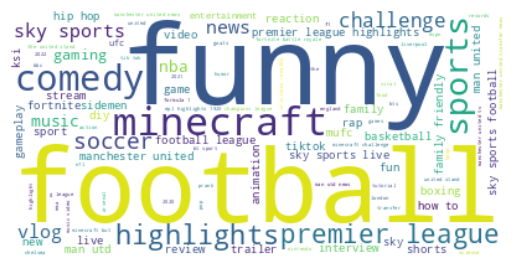

In [ ]:
# Create and generate a word cloud image for tags:
# Reference: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html

wordcloud = WordCloud(background_color="white",relative_scaling=1).generate_from_frequencies(result)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

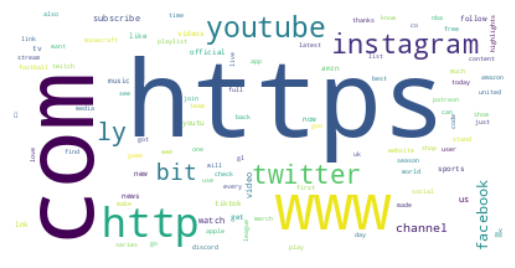

In [ ]:
# Create and generate a word cloud image for descriptions:
# Reference: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
wordcloud = WordCloud(background_color="white",relative_scaling=1).generate_from_frequencies(result1)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

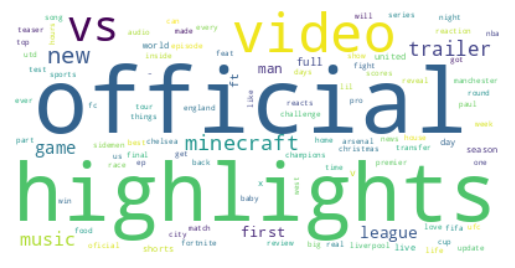

In [ ]:
# Create and generate a word cloud image from titles:
# Reference: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
wordcloud = WordCloud(background_color="white",relative_scaling=1).generate_from_frequencies(result2)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Create parallel_coordinates for all videos and their statistics:

x = df.drop('categoryId', axis=1).groupby('title').mean().reset_index()

fig = px.parallel_coordinates(x,color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2, width=1000)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
CA_youtube_df['country'] = "Canada"
GB_youtube_df['country'] = "UK"
US_youtube_df['country'] = "USA"

CA_youtube_df1 = CA_youtube_df.drop_duplicates(subset=['video_id'])
CA_youtube_df1 = CA_youtube_df1.drop(['thumbnail_link','comments_disabled','ratings_disabled'], axis=1)

GB_youtube_df1 = GB_youtube_df.drop_duplicates(subset=['video_id'])
GB_youtube_df1 = GB_youtube_df1.drop(['thumbnail_link','comments_disabled','ratings_disabled'], axis=1)

US_youtube_df1 = US_youtube_df.drop_duplicates(subset=['video_id'])
US_youtube_df1 = US_youtube_df1.drop(['thumbnail_link','comments_disabled','ratings_disabled'], axis=1)

df_country = pd.concat([CA_youtube_df1,GB_youtube_df1,US_youtube_df1])
df_country = df_country.merge(categories, on='categoryId', how='left')

In [ ]:
# Create a heat map to show the average view counts of videos in various categories, by countries
x = df_country[['view_count','categoryName','country']].groupby(['country','categoryName']).mean().reset_index()
y = []
for i in range(0,len(x),15):
  y.append(list(x.view_count[i:i+15]))

fig = px.imshow(y, width=1000, height = 400, title='Average View Counts of Trending Videos in Different Categories',
                labels=dict(x="Category", y="Country", color="Average View Count"),
                x=sorted(list(set(x.categoryName))), y=sorted(list(set(x.country))))
fig.show()

In [ ]:
# Create a heat map to show the total view counts of videos in various categories, by countries

x = df_country[['view_count','categoryName','country']].groupby(['country','categoryName']).sum().reset_index()
y = []
for i in range(0,len(x),15):
  y.append(list(x.view_count[i:i+15]))

fig = px.imshow(y, width=1000, height = 400, title='Total View Counts of Trending Videos in Different Categories',
                labels=dict(x="Category", y="Country", color="Total View Count"),
                x=sorted(list(set(x.categoryName))), y=sorted(list(set(x.country))))
fig.show()